# Unit 5 - Financial Planning

In [1]:
# Imported the necessary libraries for project

import os

import requests

import pandas as pd

from dotenv import load_dotenv

import alpaca_trade_api as tradeapi

from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Loaded .env enviroment variables

load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Created two variables called my_btc and my_eth. Set them equal to 1.2 and 5.3, respectively.

my_btc = 1.2

my_eth = 5.3

In [4]:
# Prepared Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetched current BTC price in Canadian dollars

btc_price = requests.get(btc_url).json()

btc_price = btc_price["data"]["1"]["quotes"]["CAD"]["price"]

# Fetched current ETH price in Canadian dollars

eth_price = requests.get(eth_url).json()

eth_price = eth_price["data"]["1027"]["quotes"]["CAD"]["price"]

# Printed current value of BTC-CAD and ETH-CAD 

print(f"BTC-CAD: ${btc_price:0.2f}")

print(f"ETH-CAD: ${eth_price:0.2f}")

BTC-CAD: $49055.96
ETH-CAD: $3124.73


In [6]:
# Computed the current portfolio value of cryptocurrencies.

btc_value = btc_price * my_btc

eth_value = eth_price * my_eth

# Printed current crypto wallet balance.

print(f"The current value of your {my_btc} BTC-CAD is ${btc_value:0.2f}")

print(f"The current value of your {my_eth} ETH-CAD is ${eth_value:0.2f}")




The current value of your 1.2 BTC-CAD is $58867.15
The current value of your 5.3 ETH-CAD is $16561.09


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Created two variables named my_agg and my_spy and set them equal to 200 and 50, respectively.

my_agg = 200

my_spy = 50

In [8]:
# Initialized Alpaca API key and secret.

alpaca_api_key = os.getenv("alpaca_akey")

alpaca_secret_key = os.getenv("alpaca_skey")

# Created the Alpaca API object.

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [9]:
# Formatted current date as ISO format.

## 1000 trading days from 2021-06-13

start_date = pd.Timestamp("2017-06-22", tz="America/New_York").isoformat()

end_date = pd.Timestamp("2021-06-13", tz="America/New_York").isoformat()

# Created tickers variable.

tickers = ["AGG", "SPY"]

# Formatted timeframe to '1D' for Alpaca API.

timeframe = "1D"

# Retrieved current closing prices for SPY and AGG. Created a parameter to call the most recent 1000 days of data.

tickers_df = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


# Initialized tickers_df

tickers_df.sort_index(ascending=True)


AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2017-06-22 00:00:00-04:00  110.06  110.0947  109.9500  110.050   1295361   
2017-06-23 00:00:00-04:00  110.01  110.1085  109.9800  110.070   1101304   
2017-06-26 00:00:00-04:00  110.19  110.2400  110.1300  110.160   1364100   
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.830   2883305   
2017-06-28 00:00:00-04:00  109.85  109.8800  109.6800  109.850  12016805   
...                           ...       ...       ...      ...       ...   
2021-06-07 00:00:00-04:00  113.97  114.6400  113.9700  114.595   3639918   
2021-06-08 00:00:00-04:00  114.84  114.8700  114.7800  114.820   3951702   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050   3418086   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300   3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240   3476373   

                              SPY                                      
                             open     high      low   close    volume  
time                                                                   
2017-06-22 00:00:00-04:00  242.97  243.530  242.640  242.83  32991335  
2017-06-23 00:00:00-04:00  242.91  243.510  242.470  243.16  45792641  
2017-06-26 00:00:00-04:00  243.89  244.380  243.045  243.27  43153677  
2017-06-27 00:00:00-04:00  243.04  243.380  241.310  241.36  60858189  
2017-06-28 00:00:00-04:00  242.50  243.715  242.230  243.46  50076355  
...                           ...      ...      ...     ...       ...  
2021-06-07 00:00:00-04:00  422.59  422.780  421.190  422.23  41442963  
2021-06-08 00:00:00-04:00  423.11  423.210  420.320  422.27  40131441  
2021-06-09 00:00:00-04:00  423.18  423.260  421.410  421.62  38368598  
2021-06-10 00:00:00-04:00  422.96  424.630  421.550  423.58  43577329  
2021-06-11 00:00:00-04:00  424.19  424.420  422.820  424.31  37018077  

[1000 rows x 10 columns]

In [10]:
# Assessed data quality by determining the number of nulls from tickers_df

tickers_df.isnull().sum()

# Dropped records with null from tickers_df

tickers_df.dropna(inplace = True)

# Initialized last row from tickers_df to get closing prices of AGG and SPY

tickers_df.tail(1)

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-06-11 00:00:00-04:00  115.31  115.32  115.16  115.24  3476373  424.19   

                                                             
                             high     low   close    volume  
time                                                         
2021-06-11 00:00:00-04:00  424.42  422.82  424.31  37018077

In [11]:
# Intialized AGG and SPY closing prices

agg_closing_price = tickers_df.tail(1)["AGG"]["close"][0]

spy_closing_price = tickers_df.tail(1)["SPY"]["close"][0]

# Printed current AGG and SPY closing prices

print(f"Current AGG closing price: ${agg_closing_price}")

print(f"Current SPY closing price: ${spy_closing_price}")

Current AGG closing price: $115.24
Current SPY closing price: $424.31


In [12]:
# Computed the current portfolio value of shares.

agg_value = agg_closing_price * my_agg

spy_value = spy_closing_price * my_spy

# Printed current value of shares

print(f"The current value of your {my_agg} AGG shares is ${spy_value:0.2f}")

print(f"The current value of your {my_spy} SPY shares is ${agg_value:0.2f}")

The current value of your 200 AGG shares is $21215.50
The current value of your 50 SPY shares is $23048.00


### Savings Health Analysis

In [13]:
# Created a variable of monthly household income with a value of "12000"

monthly_income = 12000

# Created a DataFrame called savings_df with two rows. Stored the total value in dollars of the crypto assets in the first row and the total value of the shares in the second row.

savings_df = pd.DataFrame([
    btc_value + eth_value,
    agg_value + spy_value
],
    columns=["Amount"],
    index=["Crypto", "Shares"]
)

# Initialized savings_df

savings_df

,Amount
Crypto,75428.244756
Shares,44263.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

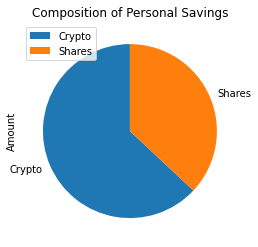

In [14]:
# Used the savings_df DataFrame to plot a pie chart to visualize the composition of personal savings.

savings_df.plot.pie( y ="Amount", title = "Composition of Personal Savings", startangle=90)



In [15]:
# Prepared variables for conditional statements to validate if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.

# Created a variable for emergency fund.

emergency_fund = monthly_income * 3

# Calculated total amount of savings

total_savings = savings_df["Amount"].sum()

print(f"Total Savings: ${total_savings:0.2f}")

# Validated if total savings are enough to cover for emergency fund.

if total_savings > emergency_fund:

    print(f"Congratulations! You have more than enough savings to cover your emergency fund.")

elif total_savings == emergency_fund:

    print(f"Congratulations! You have reached your financial goal.")

else:

    print(f"Sorry! You do not have enough savings to cover your emergency fund. You need exactly ${emergency_fund - total_savings} to reach your financial goal.")


Total Savings: $119691.74
Congratulations! You have more than enough savings to cover your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Collated and prepared variables to run Monte Carlo Simulations for AGG and SPY stock using recent historical data from "2016-06-14 to 2021-06-14"

## Take Note: Sample results may vary from the solution based on the time frame chosen.

# Retrieved current closing prices for SPY and AGG. 

# Dataframe was created on 2021-06-14 calculated 1000 trading days going backwards. Start date was set to "2017-07-23"

# Initialized tickers_df

tickers_df = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


# Initialized tickers_df

tickers_df.sort_index(ascending=True)


AGG                                           \
                             open      high       low    close      volume   
time                                                                         
2017-06-22 00:00:00-04:00  110.06  110.0947  109.9500  110.050   1295361.0   
2017-06-23 00:00:00-04:00  110.01  110.1085  109.9800  110.070   1101304.0   
2017-06-26 00:00:00-04:00  110.19  110.2400  110.1300  110.160   1364100.0   
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.830   2883305.0   
2017-06-28 00:00:00-04:00  109.85  109.8800  109.6800  109.850  12016805.0   
...                           ...       ...       ...      ...         ...   
2021-06-07 00:00:00-04:00  113.97  114.6400  113.9700  114.595   3639918.0   
2021-06-08 00:00:00-04:00  114.84  114.8700  114.7800  114.820   3951702.0   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050   3418086.0   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300   3665934.0   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240   3476373.0   

                              SPY                                      
                             open     high      low   close    volume  
time                                                                   
2017-06-22 00:00:00-04:00  242.97  243.530  242.640  242.83  32991335  
2017-06-23 00:00:00-04:00  242.91  243.510  242.470  243.16  45792641  
2017-06-26 00:00:00-04:00  243.89  244.380  243.045  243.27  43153677  
2017-06-27 00:00:00-04:00  243.04  243.380  241.310  241.36  60858189  
2017-06-28 00:00:00-04:00  242.50  243.715  242.230  243.46  50076355  
...                           ...      ...      ...     ...       ...  
2021-06-07 00:00:00-04:00  422.59  422.780  421.190  422.23  41442963  
2021-06-08 00:00:00-04:00  423.11  423.210  420.320  422.27  40131441  
2021-06-09 00:00:00-04:00  423.18  423.260  421.410  421.62  38368598  
2021-06-10 00:00:00-04:00  422.96  424.630  421.550  423.58  43577329  
2021-06-11 00:00:00-04:00  424.19  424.420  422.820  424.31  37018077  

[1000 rows x 10 columns]

In [17]:
# Created end date variable to retrieve the remaining historical data to complete the five year frame.

## tickers_df data includes historical data from (2017-06-23 to 2021-06-14) which is equivalent to exactly 1000 trading days

# Created a end_date2 variable 

end_date2 = pd.Timestamp("2017-06-21", tz='America/New_York').isoformat()

# Retrieved the remaining years' of historical data for AGG and SPY. Created a new variable tickers2_df and changed parameter to limit=260 to complete 1260 trading days back from "2021-06-14"

tickers2_df = api.get_barset(
    tickers,
    timeframe,
    end=end_date2,
    limit=260
).df

# Initialized missing historical data to complete five year frame.

tickers2_df.sort_index(ascending=True)

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2016-06-10 00:00:00-04:00  111.54  111.6575  111.45  111.505  1205373  210.46   
2016-06-13 00:00:00-04:00  111.57  111.6700  111.53  111.610  1521542  209.36   
2016-06-14 00:00:00-04:00  111.68  111.7300  111.55  111.555  1695590  208.00   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.64  111.800  1556713  208.54   
2016-06-16 00:00:00-04:00  111.92  112.0699  111.78  111.860  2314934  206.73   
...                           ...       ...     ...      ...      ...     ...   
2017-06-15 00:00:00-04:00  109.90  109.9000  109.78  109.870  1938779  242.68   
2017-06-16 00:00:00-04:00  109.86  109.9700  109.85  109.945  1709677  242.77   
2017-06-19 00:00:00-04:00  109.87  109.9000  109.74  109.790  1375531  243.59   
2017-06-20 00:00:00-04:00  109.85  110.0300  109.80  109.975  2010628  244.25   
2017-06-21 00:00:00-04:00  109.88  110.0400  109.88  109.980  1085301  243.43   

                                                                
                             high       low   close     volume  
time                                                            
2016-06-10 00:00:00-04:00  210.86  209.4300  210.06   80491207  
2016-06-13 00:00:00-04:00  210.37  208.3500  208.44   82156781  
2016-06-14 00:00:00-04:00  208.74  206.9199  208.08  102129228  
2016-06-15 00:00:00-04:00  209.36  207.5300  207.75   82945507  
2016-06-16 00:00:00-04:00  208.57  205.5900  208.42  111547742  
...                           ...       ...     ...        ...  
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79   51523068  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63   48998243  
2017-06-19 00:00:00-04:00  244.73  243.4800  244.64   42503652  
2017-06-20 00:00:00-04:00  244.26  242.9900  243.04   39203167  
2017-06-21 00:00:00-04:00  243.59  242.4100  242.95   42746920  

[260 rows x 10 columns]

In [18]:
# Checked tickers2_df for nulls.

tickers2_df.isnull().sum()

AGG  open      0
     high      0
     low       0
     close     0
     volume    0
SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [19]:
# Combined tickers_df and tickers2_df to complete 5 year time frame from "2021-06-14". Created a new dataset labeled as combined_data_df.

combined_data_df = pd.concat([tickers_df, tickers2_df], axis = 0, join ="inner")

# Initialized combined_data_df.

combined_data_df.sort_index(ascending=True)


AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-06-10 00:00:00-04:00  111.54  111.6575  111.4500  111.505  1205373.0   
2016-06-13 00:00:00-04:00  111.57  111.6700  111.5300  111.610  1521542.0   
2016-06-14 00:00:00-04:00  111.68  111.7300  111.5500  111.555  1695590.0   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.6400  111.800  1556713.0   
2016-06-16 00:00:00-04:00  111.92  112.0699  111.7800  111.860  2314934.0   
...                           ...       ...       ...      ...        ...   
2021-06-07 00:00:00-04:00  113.97  114.6400  113.9700  114.595  3639918.0   
2021-06-08 00:00:00-04:00  114.84  114.8700  114.7800  114.820  3951702.0   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050  3418086.0   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665934.0   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3476373.0   

                              SPY                                       
                             open    high       low   close     volume  
time                                                                    
2016-06-10 00:00:00-04:00  210.46  210.86  209.4300  210.06   80491207  
2016-06-13 00:00:00-04:00  209.36  210.37  208.3500  208.44   82156781  
2016-06-14 00:00:00-04:00  208.00  208.74  206.9199  208.08  102129228  
2016-06-15 00:00:00-04:00  208.54  209.36  207.5300  207.75   82945507  
2016-06-16 00:00:00-04:00  206.73  208.57  205.5900  208.42  111547742  
...                           ...     ...       ...     ...        ...  
2021-06-07 00:00:00-04:00  422.59  422.78  421.1900  422.23   41442963  
2021-06-08 00:00:00-04:00  423.11  423.21  420.3200  422.27   40131441  
2021-06-09 00:00:00-04:00  423.18  423.26  421.4100  421.62   38368598  
2021-06-10 00:00:00-04:00  422.96  424.63  421.5500  423.58   43577329  
2021-06-11 00:00:00-04:00  424.19  424.42  422.8200  424.31   37018077  

[1260 rows x 10 columns]

In [20]:
# Checked data for nulls and duplicates. Prepared data for initialization.

combined_data_df.isnull().sum()

combined_data_df.dropna()

combined_data_df.duplicated().sum()

combined_data_df.duplicated(subset=None, keep='first')

# Initialized combined data frame of historical closing prices of AGG and SPY from "2016-06-06 to 2021-06-14"

combined_data_df.sort_index(ascending=True)

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-06-10 00:00:00-04:00  111.54  111.6575  111.4500  111.505  1205373.0   
2016-06-13 00:00:00-04:00  111.57  111.6700  111.5300  111.610  1521542.0   
2016-06-14 00:00:00-04:00  111.68  111.7300  111.5500  111.555  1695590.0   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.6400  111.800  1556713.0   
2016-06-16 00:00:00-04:00  111.92  112.0699  111.7800  111.860  2314934.0   
...                           ...       ...       ...      ...        ...   
2021-06-07 00:00:00-04:00  113.97  114.6400  113.9700  114.595  3639918.0   
2021-06-08 00:00:00-04:00  114.84  114.8700  114.7800  114.820  3951702.0   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050  3418086.0   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665934.0   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3476373.0   

                              SPY                                       
                             open    high       low   close     volume  
time                                                                    
2016-06-10 00:00:00-04:00  210.46  210.86  209.4300  210.06   80491207  
2016-06-13 00:00:00-04:00  209.36  210.37  208.3500  208.44   82156781  
2016-06-14 00:00:00-04:00  208.00  208.74  206.9199  208.08  102129228  
2016-06-15 00:00:00-04:00  208.54  209.36  207.5300  207.75   82945507  
2016-06-16 00:00:00-04:00  206.73  208.57  205.5900  208.42  111547742  
...                           ...     ...       ...     ...        ...  
2021-06-07 00:00:00-04:00  422.59  422.78  421.1900  422.23   41442963  
2021-06-08 00:00:00-04:00  423.11  423.21  420.3200  422.27   40131441  
2021-06-09 00:00:00-04:00  423.18  423.26  421.4100  421.62   38368598  
2021-06-10 00:00:00-04:00  422.96  424.63  421.5500  423.58   43577329  
2021-06-11 00:00:00-04:00  424.19  424.42  422.8200  424.31   37018077  

[1260 rows x 10 columns]

In [21]:
# Configured a Monte Carlo simulation to forecast 30 years cumulative returns using combined_data_df. 

mc_30year = MCSimulation(
    portfolio_data = combined_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [22]:
# Printed the simulation input data of MC_30year.

mc_30year.portfolio_data.sort_index()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-06-10 00:00:00-04:00  111.54  111.6575  111.4500  111.505  1205373.0   
2016-06-13 00:00:00-04:00  111.57  111.6700  111.5300  111.610  1521542.0   
2016-06-14 00:00:00-04:00  111.68  111.7300  111.5500  111.555  1695590.0   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.6400  111.800  1556713.0   
2016-06-16 00:00:00-04:00  111.92  112.0699  111.7800  111.860  2314934.0   
...                           ...       ...       ...      ...        ...   
2021-06-07 00:00:00-04:00  113.97  114.6400  113.9700  114.595  3639918.0   
2021-06-08 00:00:00-04:00  114.84  114.8700  114.7800  114.820  3951702.0   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050  3418086.0   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665934.0   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3476373.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2016-06-10 00:00:00-04:00    -0.032411  210.46  210.86  209.4300  210.06   
2016-06-13 00:00:00-04:00     0.000942  209.36  210.37  208.3500  208.44   
2016-06-14 00:00:00-04:00    -0.000493  208.00  208.74  206.9199  208.08   
2016-06-15 00:00:00-04:00     0.002196  208.54  209.36  207.5300  207.75   
2016-06-16 00:00:00-04:00     0.000537  206.73  208.57  205.5900  208.42   
...                                ...     ...     ...       ...     ...   
2021-06-07 00:00:00-04:00    -0.000610  422.59  422.78  421.1900  422.23   
2021-06-08 00:00:00-04:00     0.001963  423.11  423.21  420.3200  422.27   
2021-06-09 00:00:00-04:00     0.002003  423.18  423.26  421.4100  421.62   
2021-06-10 00:00:00-04:00     0.002173  422.96  424.63  421.5500  423.58   
2021-06-11 00:00:00-04:00    -0.000520  424.19  424.42  422.8200  424.31   

                                                   
                              volume daily_return  
time                                               
2016-06-10 00:00:00-04:00   80491207    -0.504937  
2016-06-13 00:00:00-04:00   82156781    -0.007712  
2016-06-14 00:00:00-04:00  102129228    -0.001727  
2016-06-15 00:00:00-04:00   82945507    -0.001586  
2016-06-16 00:00:00-04:00  111547742     0.003225  
...                              ...          ...  
2021-06-07 00:00:00-04:00   41442963    -0.000805  
2021-06-08 00:00:00-04:00   40131441     0.000095  
2021-06-09 00:00:00-04:00   38368598    -0.001539  
2021-06-10 00:00:00-04:00   43577329     0.004649  
2021-06-11 00:00:00-04:00   37018077     0.001723  

[1260 rows x 12 columns]

In [23]:
# Initialized a Monte Carlo simulation to forecast 30 years cumulative returns.

mc_30year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996171,0.993344,0.993671,0.998429,0.998646,1.000043,0.976613,1.005293,0.997109,1.020060,...,1.021355,0.990989,1.001426,0.978426,1.009430,0.996583,1.021015,0.999032,0.989873,0.998469
2,0.995785,0.988252,0.993115,1.005997,0.987170,0.982561,0.979250,1.000309,0.986303,1.009631,...,1.019810,0.971084,0.987951,0.983588,1.012439,0.997431,1.013933,1.006463,0.991386,0.981867
3,1.001535,0.968685,0.994387,1.006168,0.974550,0.984007,0.982813,1.001603,0.998611,1.005826,...,1.027183,0.970467,0.990955,0.982878,1.031415,1.006097,0.994401,0.992492,1.000150,0.977298
4,1.022252,0.976212,0.988717,1.007307,0.957326,0.987986,0.976154,1.028446,0.987629,1.007749,...,1.036558,0.980628,1.001167,0.976753,1.031212,0.988035,0.986593,0.972142,0.995055,0.987994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.497686,7.862631,1.139325,2.735642,1.146445,5.097681,2.571680,7.070565,1.782487,3.496906,...,0.741430,0.474405,5.869538,9.244084,9.267917,0.788469,3.185449,1.903604,2.216182,0.523112
7557,8.492261,8.044479,1.132654,2.708773,1.144496,5.189439,2.571318,7.030985,1.823626,3.472531,...,0.723532,0.479489,5.837232,9.235350,9.161339,0.781234,3.158426,1.919506,2.214146,0.519787
7558,8.566020,8.091988,1.146924,2.703397,1.137430,5.287280,2.554045,7.119872,1.842107,3.483539,...,0.727343,0.480963,5.871517,9.058296,9.180063,0.787369,3.078064,1.909178,2.228628,0.519445
7559,8.535848,8.074979,1.147699,2.729524,1.144784,5.409690,2.546789,7.113951,1.872961,3.431608,...,0.731234,0.492588,5.688435,9.015670,9.278576,0.783140,3.127655,1.894578,2.248660,0.512090


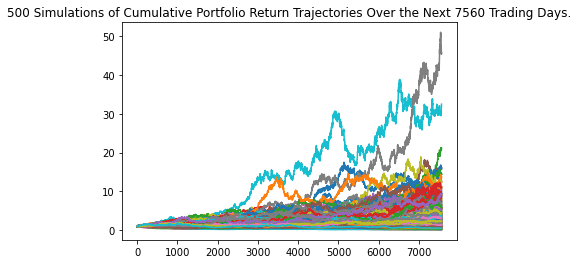

In [24]:
# Plotted simulation outcomes of MC_30year dataframe. 

line_plot1 = mc_30year.plot_simulation()

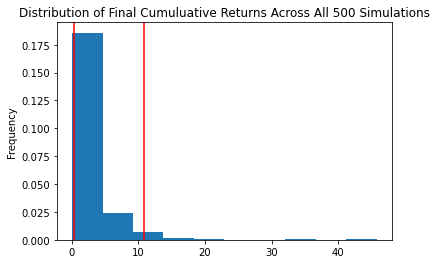

In [25]:
# Plotted probability distribution and confidence intervals of MC_30year dataframe. 

dist_plot1 = mc_30year.plot_distribution()

### Retirement Analysis

In [26]:
# Created summary statistics from the Monte Carlo simulation results for MC_30year dataframe and labeled variable as "tbl1"

tbl1 = mc_30year.summarize_cumulative_return()

# Printed summary statistics of "tbl1"

tbl1

count           500.000000
mean              2.760060
std               3.547082
min               0.038264
25%               0.877338
50%               1.834406
75%               3.119583
max              45.782651
95% CI Lower      0.272315
95% CI Upper     10.906929
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Created a variable initial_investment1 with a value of 20000. 

initial_investment1 = 20000

# Created variables for the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of the $20,000 investment.

ci_lower1 = round(tbl1[8]*20000,2)

ci_upper1 = round(tbl1[9]*20000,2)


# Initialized results

print(f"There is a 95% chance that an initial investment of ${initial_investment1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower1} and ${ci_upper1}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $5446.3 and $218138.58


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Created a variable initial_investment2 with a value of 20000 * 1.5. 

initial_investment2 = 20000 * 1.5

# Created variables for the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of the $30,000 investment.

ci_lower2 = round(tbl1[8]*30000,2)

ci_upper2 = round(tbl1[9]*30000,2)

# Initialized results

print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $8169.45 and $327207.86


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configured a Monte Carlo simulation to forecast 5 years cumulative returns.


mc_5year = MCSimulation(
    portfolio_data = combined_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [30]:
# Initialized a Monte Carlo simulation to forecast 5 years cumulative returns.

mc_5year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993411,0.999158,0.985842,0.999676,0.997241,0.990359,1.004427,1.023721,1.003281,0.985714,...,0.997444,1.002581,1.001925,1.012678,0.999995,1.003340,1.017913,1.007104,0.997204,1.013977
2,1.000339,0.999218,0.985206,0.988315,0.997843,0.985191,0.983398,1.014391,1.010920,0.971182,...,0.999749,0.998763,1.028826,1.010248,0.999184,0.994921,1.018631,1.031240,1.015683,1.004186
3,0.984310,0.980612,0.964179,0.970401,0.988415,0.973440,0.978087,1.006205,1.012748,0.954859,...,0.996331,1.001034,1.044364,1.014672,0.985203,0.994348,1.030855,1.055098,0.999878,1.001203
4,0.993013,0.981408,0.975983,0.962896,0.990650,0.987254,0.951887,0.986501,1.010978,0.942879,...,1.025262,0.996863,1.029677,1.002008,0.979283,0.994850,1.023348,1.051334,0.996186,0.999767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.346745,0.953902,1.402196,1.110988,0.641459,1.915137,0.802264,1.272209,1.067480,1.252508,...,1.734250,1.917402,1.252402,0.969100,0.924599,1.599000,1.625753,1.297524,0.632249,0.653817
1257,0.345122,0.937936,1.422485,1.119474,0.633527,1.882025,0.794733,1.271680,1.064688,1.239460,...,1.724134,1.887212,1.266580,0.955190,0.922853,1.582948,1.635113,1.285663,0.624560,0.650916
1258,0.342474,0.944546,1.397873,1.105633,0.634459,1.876679,0.798152,1.284682,1.050831,1.249424,...,1.717630,1.861897,1.271993,0.954072,0.926667,1.591505,1.626107,1.283962,0.625395,0.653413
1259,0.344834,0.940059,1.399320,1.082814,0.639801,1.878451,0.792086,1.253009,1.047018,1.232383,...,1.712839,1.845055,1.275995,0.958481,0.925093,1.586646,1.611840,1.286435,0.628052,0.646870


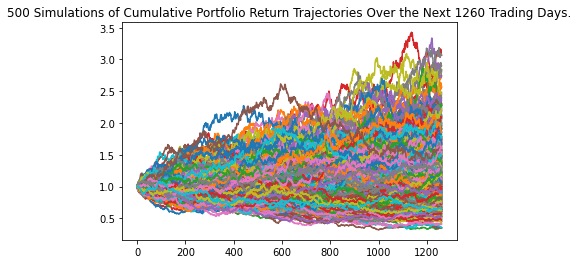

In [31]:
# Plotted simulation outcomes for MC_5year dataframe. 

line_plot2 = mc_5year.plot_simulation()

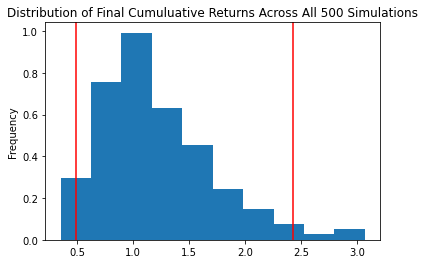

In [32]:
# Plotted probability distribution and confidence intervals for MC_5year dataframe.

dist_plot2 = mc_5year.plot_distribution()

In [33]:
# Created summary statistics from the Monte Carlo simulation results for MC_5year dataframe and labeled variable as "tbl2"

tbl2 = mc_5year.summarize_cumulative_return()

# Printed summary statistics of "tbl2"

tbl2

count           500.000000
mean              1.202149
std               0.501242
min               0.348647
25%               0.850735
50%               1.081673
75%               1.478926
max               3.071202
95% CI Lower      0.488858
95% CI Upper      2.427060
Name: 1260, dtype: float64

In [34]:
# Created a variable initial investment3 with the value of 20000 * 3

initial_investment3 = 20000 * 3

# Created variables for the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower3 = round(tbl2[8]*60000,2)

ci_upper3 = round(tbl2[9]*60000,2)

# Initialized results

print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower3} and ${ci_upper3}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $29331.51 and $145623.62


### Ten Years Retirement Option

In [35]:
# Configured a Monte Carlo simulation to forecast 10 years cumulative returns using combined_data_df

mc_10year = MCSimulation(
    portfolio_data = combined_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [36]:
# Initialized a Monte Carlo simulation to forecast 10 years cumulative returns.

mc_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987950,0.991369,0.983051,1.003017,0.992543,1.009046,1.006141,0.983601,1.010258,0.993223,...,0.987119,0.994532,1.003597,1.010578,1.007259,1.008720,0.994326,0.992633,1.011736,0.995648
2,0.992443,0.969129,0.983142,1.025809,1.000458,1.014876,1.006288,0.976029,1.012223,0.994435,...,0.964880,0.983444,1.011016,1.012408,0.998012,1.030686,0.996245,0.994779,0.995501,0.993629
3,0.980455,0.969680,1.009198,1.038540,0.999017,1.016590,1.004644,0.964929,1.013683,0.988105,...,0.952502,0.978890,1.014881,1.014574,0.987119,1.004892,1.009033,0.984165,1.015661,1.017658
4,0.985708,0.965839,1.014282,1.028704,0.985206,1.003472,1.000742,0.968561,1.000615,0.987169,...,0.958815,0.986337,1.030957,1.016367,0.999873,0.997897,1.008495,0.996234,1.019691,1.014960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.959760,1.835846,1.821768,1.419418,0.986554,1.391790,0.803187,1.760418,1.323852,1.543893,...,1.576542,0.419217,0.496379,2.103883,1.319725,4.842115,1.308588,0.549567,0.711778,1.449617
2517,0.956657,1.842935,1.830750,1.414720,0.995323,1.359741,0.798071,1.739834,1.335186,1.530840,...,1.550367,0.424078,0.497709,2.085500,1.311715,4.838300,1.297605,0.545301,0.716544,1.437056
2518,0.939141,1.870561,1.812321,1.399748,1.017825,1.343407,0.803576,1.744984,1.349399,1.510033,...,1.569091,0.418807,0.495228,2.113913,1.282841,4.788062,1.293284,0.543064,0.708951,1.431410
2519,0.941077,1.912079,1.807554,1.430037,1.037916,1.360111,0.790324,1.722437,1.335388,1.508659,...,1.575530,0.418691,0.495505,2.105682,1.280791,4.709416,1.315217,0.538662,0.704138,1.440564


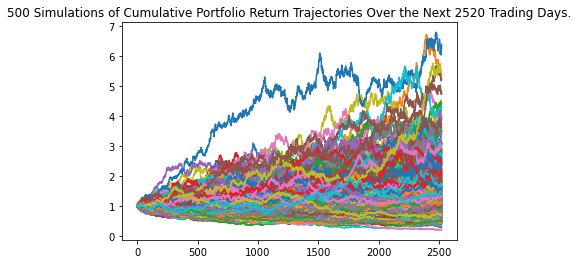

In [37]:
# Plotted simulation outcomes for MC_10year dataframe.

line_plot3 = mc_10year.plot_simulation()

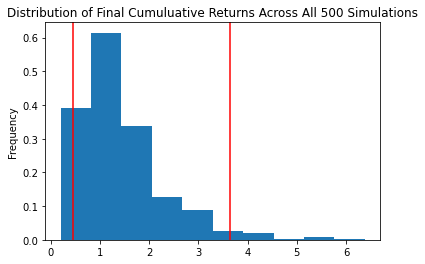

In [38]:
# Plotted probability distribution and confidence intervals for MC_10year dataframe.

dist_plot3 = mc_10year.plot_distribution()

In [39]:
# Created summary statistics from the Monte Carlo simulation results for MC_10year dataframe and labeled it as "tbl3"

tbl3 = mc_10year.summarize_cumulative_return()

# Printed summary statistics of "tbl3"

tbl3

count           500.000000
mean              1.419277
std               0.867964
min               0.199625
25%               0.825961
50%               1.189925
75%               1.759150
max               6.384199
95% CI Lower      0.451257
95% CI Upper      3.652666
Name: 2520, dtype: float64

In [40]:
# Created a variable for initial investment4 with the value of 20000 * 3 

initial_investment4 = 20000 * 3

# Created variables for the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower4 = round(tbl3[8]*60000,2)

ci_upper4 = round(tbl3[9]*60000,2)

# Initialized results

print(f"There is a 95% chance that an initial investment of ${initial_investment4} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower4} and ${ci_upper4}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $27075.4 and $219159.98
